# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [234]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [235]:
df.std()

admit         0.466044
gre         115.717787
gpa           0.380208
prestige      0.947083
dtype: float64

0    271
1    126
Name: admit, dtype: int64

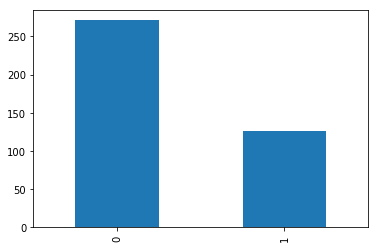

In [236]:
df['admit'].value_counts().plot.bar()
df['admit'].value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

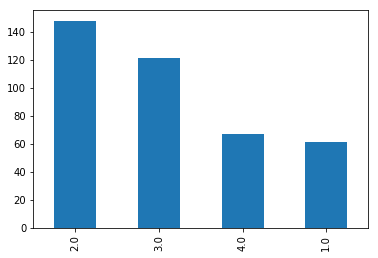

In [237]:
df['prestige'].value_counts().plot.bar()
df['prestige'].value_counts()

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [238]:
dummies = pd.get_dummies(df['prestige'], prefix = 'prestige')
df_with_dummies = df[['admit' , 'gre', 'gpa']].join(dummies)

In [239]:
df_with_dummies.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [240]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix = 'prestige')

In [241]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
handCalc.head()

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [242]:
crosstab_table = pd.crosstab(df.admit, df.prestige, margins=True)
crosstab_table

prestige,1.0,2.0,3.0,4.0,All
admit,,,,,
0,28,95,93,55,271
1,33,53,28,12,126
All,61,148,121,67,397


In [243]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
freq_table_1 = pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'], margins=True)
freq_table_1

prestige_1.0,0,1,All
admit,,,
0,243,28,271
1,93,33,126
All,336,61,397


In [244]:
freq_table_1.loc[ : , [1, 'All']]

prestige_1.0,1,All
admit,,
0,28,271
1,33,126
All,61,397


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [360]:
def odds_calc(x, y):
    #Where: x = Admission w/ prestige_1.0
           #y = Total Admits
    return x / y

In [361]:
odds_1 = odds_calc(33, 126)
odds_1

0.2619047619047619

In [344]:
#wondering if this is also RIGHT
freq_table_1_odds = pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'], margins=True, normalize='index')
freq_table_1_odds.loc[ : , [1, ]]

prestige_1.0,1
admit,
0,0.103321
1,0.261905
All,0.153652


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [246]:
freq_table_1_odds.loc[ : , [0 ]]

prestige_1.0,0
admit,
0,0.896679
1,0.738095
All,0.846348


In [345]:
freq_table_1.loc[ : , [0]]

prestige_1.0,0
admit,
0,243
1,93
All,336


In [362]:
odds_2 = odds_calc(93, 126)
odds_2

0.7380952380952381

#### 3.3 Calculate the odds ratio

In [375]:
def OR(x, y):
    #hand-calculating Odds Ratio (OR)
    return ((x / (1-x)) / (y / (1-y)))

In [376]:
OR(odds_1, odds_2)

0.12591050988553587

#### 3.4 Write this finding in a sentenance: 

Answer: ~ 87% more likely to gain admission if prestige_1.0 == True, as compared to all other Admits

#### 3.5 Print the cross tab for prestige_4

In [248]:
freq_table_4 = pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'], margins=True)
freq_table_4

prestige_4.0,0,1,All
admit,,,
0,216,55,271
1,114,12,126
All,330,67,397


In [249]:
freq_table_4.loc[ : , [1, 'All']]

prestige_4.0,1,All
admit,,
0,55,271
1,12,126
All,67,397


#### 3.6 Calculate the OR 

In [370]:
odds_4 = odds_calc(12, 126)
odds_4

0.09523809523809523

In [250]:
freq_table_4_odds = pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'], margins=True, normalize='index')
freq_table_4_odds.loc[ : , [1, ]]

prestige_4.0,1
admit,
0,0.202952
1,0.095238
All,0.168766


In [374]:
OR(odds_4, odds_1)

0.2966507177033493

#### 3.7 Write this finding in a sentence

Answer: If attending a college with a rank of Prestige_4.0, you have a 10% likelihood of admission. And if compared to Prestige_1.0, you are 71% more likely NOT to be admitted. 

## Part 4. Analysis

In [333]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [334]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [335]:
import statsmodels

In [336]:
from sklearn.linear_model import LogisticRegression 


In [337]:
train_cols = data.columns[1 :]


#### 4.2 Fit the model

In [328]:
logit = sm.Logit(data['admit'], data[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [331]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Aug 2017   Pseudo R-squ.:                 0.08166
Time:                        16:55:03   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032      -1.301      -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000      -2.015      -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000      -2.372      -0.735
intercept       -3.8769      1.142     -3.393      0.001      -6.116      -1.638
================================================================================
"""

In [292]:
result.conf_int()

,0,1
gre,0.000074,0.004362
gpa,0.127619,1.431056
prestige_2.0,-1.301337,-0.058936
prestige_3.0,-2.014579,-0.662776
prestige_4.0,-2.371624,-0.735197
intercept,-6.116077,-1.637631


#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [258]:
np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64

In [259]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
gre,1.000074,1.004372,1.002221
gpa,1.136120,4.183113,2.180027
prestige_2.0,0.272168,0.942767,0.506548
prestige_3.0,0.133377,0.515419,0.262192
prestige_4.0,0.093329,0.479411,0.211525
intercept,0.002207,0.194440,0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: 50% increase of chance of admission if having attended college with prestige_2.0

#### 4.6 Interpret the OR of GPA

Answer: 218% increase of chance with each increase of GRE

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [260]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [261]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print (gres)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print (gpas)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


TypeError: slice indices must be integers or None or have an __index__ method

#### 5.1 Recreate the dummy variables

In [ ]:
# recreate the dummy variables

# keep only what we need for making predictions


#### 5.2 Make predictions on the enumerated dataset

#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.